In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Chhota Bhai,1966
1,Roaring Road,1926
2,Swipe,2011
3,Vestidas y alborotadas,1968
4,Lion,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [5]:
N = titles
N =N.title.value_counts()
N

Hamlet                                        19
Carmen                                        15
Macbeth                                       15
The Outsider                                  11
Maya                                          11
Othello                                       11
The Three Musketeers                          11
Kismet                                        10
Anna Karenina                                 10
Hero                                          10
Honeymoon                                     10
Anna                                          10
Paradise                                      10
Temptation                                    10
She                                           10
Vendetta                                       9
Love                                           9
Hide and Seek                                  9
Vengeance                                      9
Underground                                    9
Ultimatum           

### Which three years of the 1930s saw the most films released?

In [6]:
N =titles
N =N[N.year//10 == 193]
N =N.year.value_counts().head(3)
N

1937    1187
1936    1129
1938    1125
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

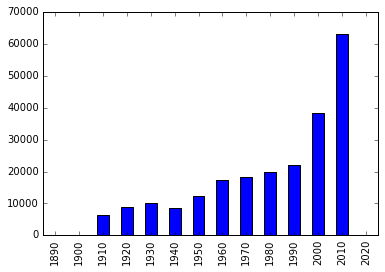

In [7]:
N =titles
N=(N.year//10 * 10).value_counts().sort_index()
N.plot(kind ='bar')


### Plot the number of "Hamlet" films made each decade.

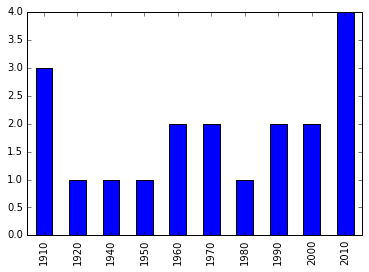

In [8]:
N =titles
N=N[N.title == "Hamlet"]
N=(N.year//10 *10).value_counts().sort_index()
N.plot(kind ='bar')


### Plot the number of "Rustler" characters in each decade of the history of film.

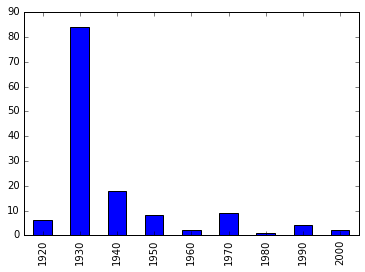

In [9]:
C =cast
C=C[C.character == "Rustler"]
C=(C.year//10 *10).value_counts().sort_index()
C.plot(kind ='bar')

### Plot the number of "Hamlet" characters each decade.

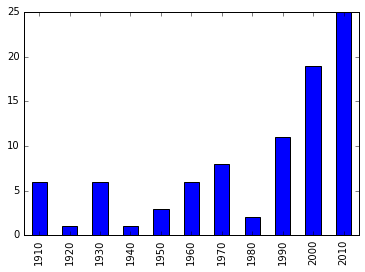

In [10]:
C =cast
C=C[C.character == "Hamlet"]
C=(C.year//10 *10).value_counts().sort_index()
C.plot(kind ='bar')

### What are the 11 most common character names in movie history?

In [11]:
C =cast
C=C.character.value_counts().head(11)
C

Himself        19186
Dancer         11692
Extra          10274
Reporter        7918
Doctor          7212
Student         6756
Policeman       6722
Party Guest     6501
Nurse           6436
Bartender       6383
Minor Role      6150
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [12]:
C =cast
C=C[C.character == 'Herself'].name
C=C.value_counts().head(10)
C

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       7
Mary Jo Pehl            7
Joan Rivers             6
Hillary Clinton         5
Jane Fonda              5
Sally Jessy Raphael     5
Rekha                   5
Marilyn Monroe          5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [13]:
C =cast
C=C[C.character == 'Himself'].name
C=C.value_counts().head(10)
C

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Bill Clinton             20
Franklin D. Roosevelt    20
Benito Mussolini         20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [14]:
C =cast
C=C[C.year == 1945]
C=C.name.value_counts().head(10)
C

Emmett Vogan       39
Sam (II) Harris    30
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
Frank O'Connor     26
Larry Steers       25
Franklyn Farnum    25
Edmund Cobb        24
Tom London         24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [15]:
C =cast
C=C[C.year == 1985]
C=C.name.value_counts().head(10)
C

Mammootty           21
Sukumari            19
Shakti Kapoor       19
Lou Scheimer        15
Mohanlal            15
Aruna Irani         14
Raj Babbar          14
Rajesh Khanna       13
Deven Verma         13
Satyendra Kapoor    12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

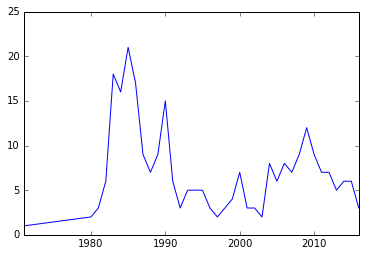

In [16]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot(kind ='line')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [17]:
N=cast[cast.character.str.startswith('Patron in')]
N=N.character.value_counts().head(10)
N

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in restaurant             3
Patron in Club                   3
Patron in Restaurant             3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [18]:
N=cast[cast.character.str.startswith('Science')]
N=N.character.value_counts().head(10)
N

Science Teacher         56
Science Student          9
Science Fair Student     9
Science Reporter         5
Science Fair Judge       5
Science Promo Cadet      5
Science Club Member      5
Science Kid              4
Science teacher          3
Science                  3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

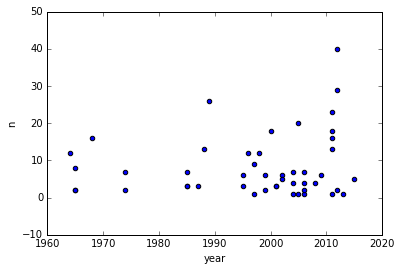

In [19]:
N=cast[cast.name == 'Judi Dench'].sort_values(by ='year')
N=N[N.n.notnull()]
N.plot(x='year', y= 'n', kind ='scatter')


### Plot the n-values of Cary Grant's roles through his career.

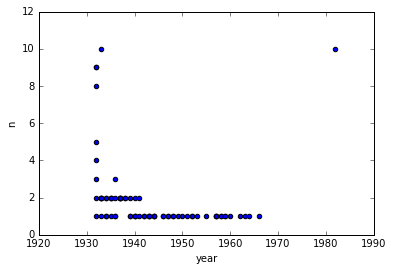

In [20]:
N=cast[cast.name == 'Cary Grant'].sort_values(by ='year')
N=N[N.n.notnull()]
N.plot(x='year', y= 'n', kind ='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

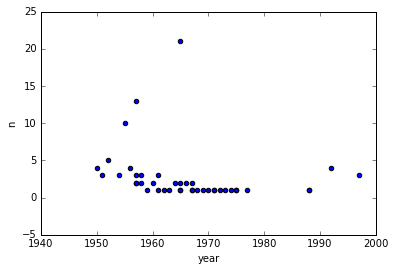

In [21]:
N=cast[cast.name == 'Sidney Poitier'].sort_values(by ='year')
N=N[N.n.notnull()]
N
N.plot(x='year', y= 'n', kind ='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [22]:
N=cast[(cast.n == 1) & (cast.year//10 == 195)].sort_values(by ='year')
N.type.value_counts()


actor      6518
actress    2894
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [23]:
N=cast[(cast.n == 2) & (cast.year//10 == 195)].sort_values(by ='year')
N.type.value_counts()

actress    4493
actor      4473
Name: type, dtype: int64

Charles Starrett    200
Mohanlal            192
Mammootty           187
Buck Jones          130
Rajesh Khanna       127
Name: name, dtype: int64

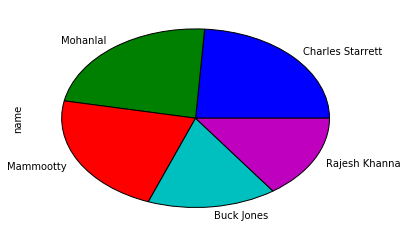

In [30]:
N=cast[(cast.n == 1)].sort_values(by ='year')
N=N.name.value_counts().head(5)
N.plot(kind= 'pie')
N

Al St. John        79
Smiley Burnette    68
Rekha              67
Raymond Hatton     65
Hema Malini        62
Name: name, dtype: int64

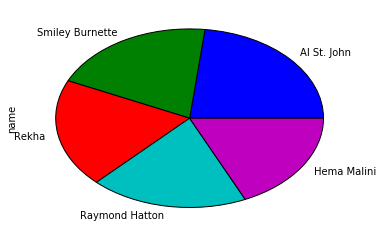

In [31]:
N=cast[(cast.n == 2)].sort_values(by ='year')
N=N.name.value_counts().head(5)
N.plot(kind= 'pie')
N